In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz


In [9]:
# Load dataset
df = pd.read_csv('data.csv')

# Drop ID column
df = df.drop('id', axis=1)

# Encode target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant = 1, Benign = 0

# Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9298245614035088
[[67  4]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



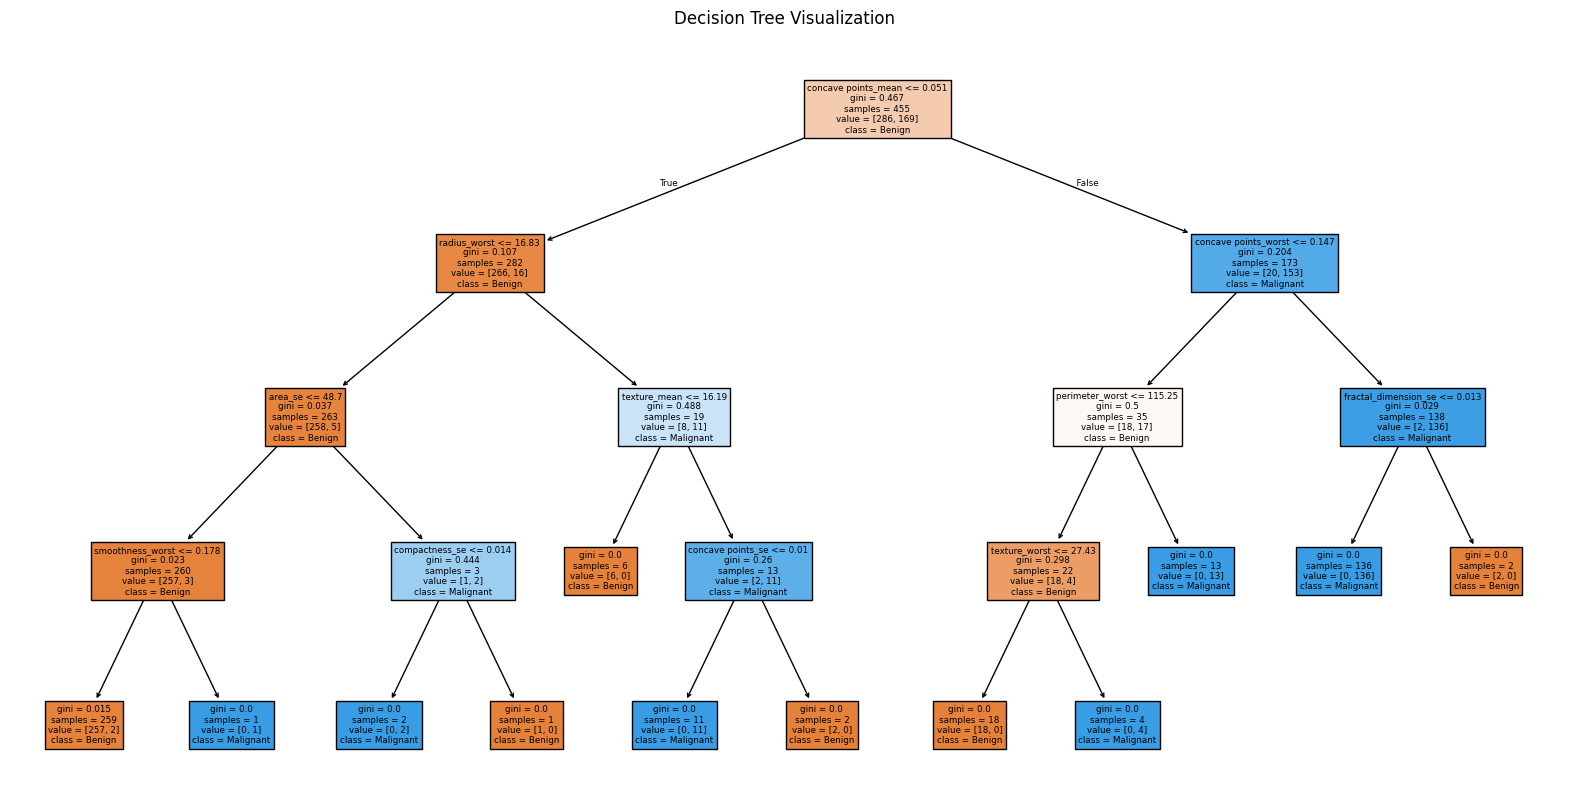

In [5]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 2. Load dataset (assuming you've already cleaned/converted diagnosis to numeric)
data = pd.read_csv('data.csv')  # replace with your actual CSV filename

# 3. Convert 'diagnosis' column to 0 (Benign) and 1 (Malignant) if not already
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# 4. Split features and target
X = data.drop(columns=['id', 'diagnosis'])  # Features
y = data['diagnosis']                       # Target

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=4)  # control overfitting with max_depth
dt.fit(X_train, y_train)

# 7. Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


✅ Random Forest Accuracy: 0.9649122807017544

🔍 Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



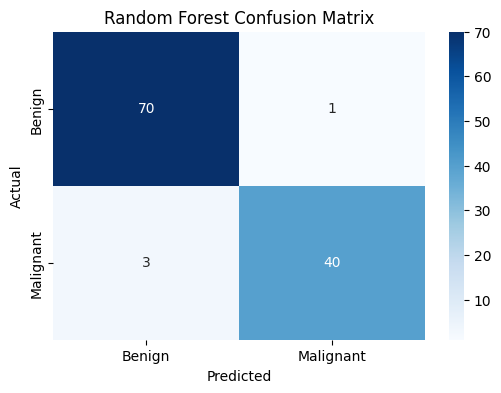

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

# Accuracy
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


C:\Users\Rohith S D\AppData\Local\Temp\ipykernel_15956\1988882854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")
C:\Users\Rohith S D\AppData\Local\Temp\ipykernel_15956\1988882854.py:10: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Rohith S D\Documents\Elevatelabs\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


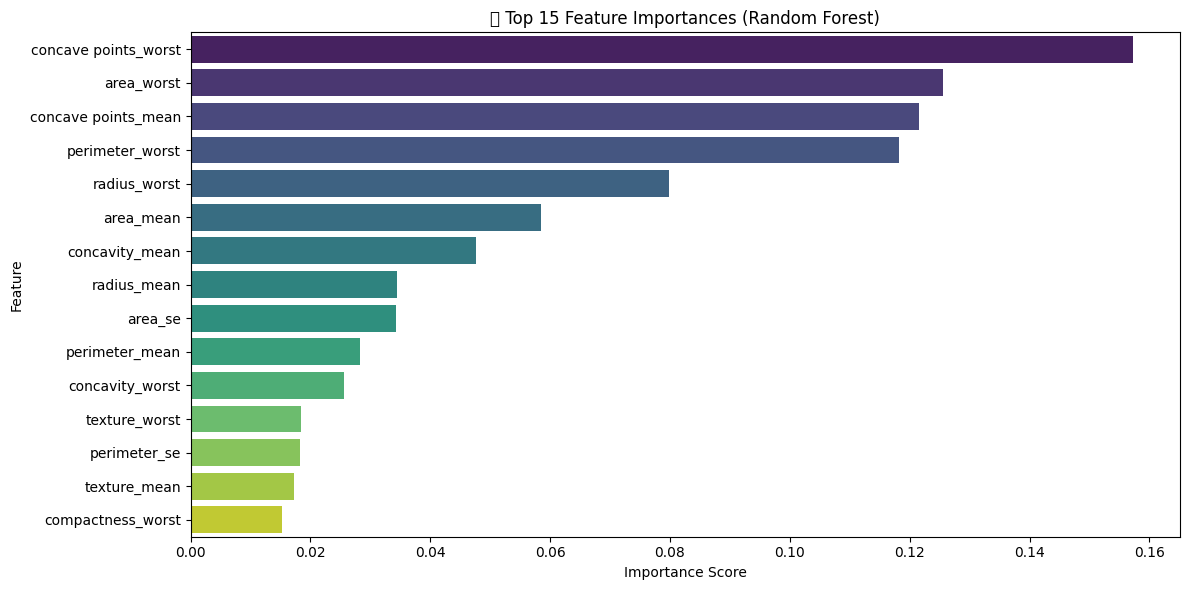

In [8]:
# Feature importances
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title("📌 Top 15 Feature Importances (Random Forest)")
sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
